

# Multi Task Learning with NLP (Project)
> #### Detect Emotions, Violence, Hate from text



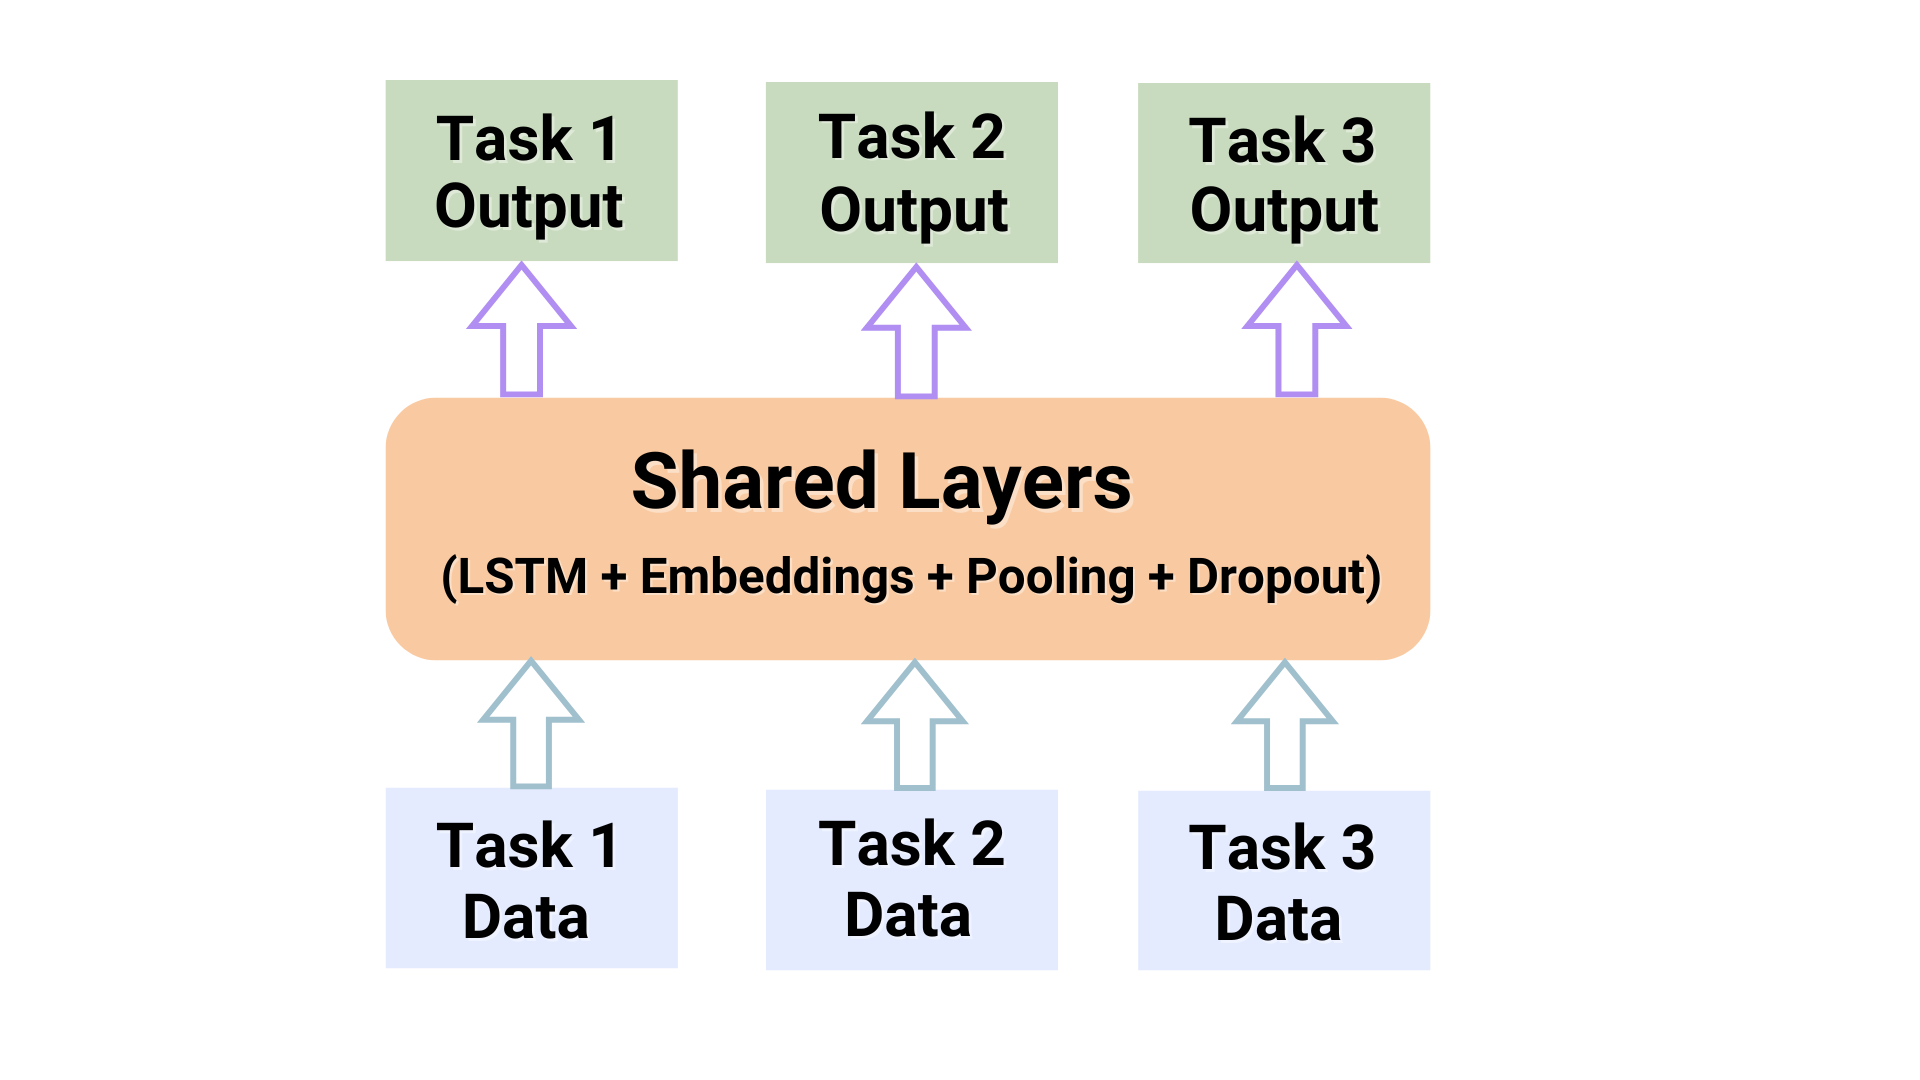

**Emotions**<br>
`0` : Sadness<br>
`1` : Joy<br>
`2` : Love<br>
`3` : Anger<br>
`4` : Fear<br>
`5` : Surprise

**Violence**<br>
`0` : Harmful_Traditional_practice<br>
`1` : Physical_violence<br>
`2` : economic_violence<br>
`3` : emotional_violence<br>
`4` : sexual_violence<br>

**Hate**<br>
`0` : Hate Speech<br>
`1` : Offensive Speech<br>
`2` : Neither

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
warnings.filterwarnings('ignore')

# **Data Loading**

In [ ]:
emotion_df = pd.read_csv('Emotions.csv')
violence_df = pd.read_csv('Violence_Train.csv')
hate_df = pd.read_csv('hate_labeled_data.csv')

In [ ]:
emotion_df.shape, violence_df.shape, hate_df.shape

((416809, 3), (39650, 3), (24783, 7))

In [ ]:
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [ ]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# **Data Preprocessing**

In [ ]:
#dropping unwanted columns
emotion_df.drop(columns = ['Unnamed: 0'], inplace=True)
violence_df.drop(columns = ['Tweet_ID'], inplace=True)
hate_df = hate_df[['tweet','class']]

In [ ]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [ ]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [ ]:
emotion_df.columns, violence_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['tweet', 'class'], dtype='object'))

In [ ]:
#renaming the column names for uniformity
violence_df.rename(columns = {'tweet':'text','type':'label'}, inplace=True)
hate_df.rename(columns = {'tweet':'text','class':'label'}, inplace=True)

In [ ]:
emotion_df.columns, violence_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

In [ ]:
# checking for null values
emotion_df.isna().sum(), violence_df.isna().sum(), hate_df.isna().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [ ]:
emotion_df.dropna(inplace=True)

In [ ]:
# checking for null values
emotion_df.isna().sum(), violence_df.isna().sum(), hate_df.isna().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [ ]:
emotion_df.shape, violence_df.shape, hate_df.shape

((416809, 2), (39650, 2), (24783, 2))

In [ ]:
# checking for duplicates
emotion_df.duplicated().sum(), violence_df.duplicated().sum(), hate_df.duplicated().sum()

(np.int64(686), np.int64(6), np.int64(0))

In [ ]:
emotion_df.drop_duplicates(inplace=True), violence_df.drop_duplicates(inplace=True), hate_df.drop_duplicates(inplace=True)

(None, None, None)

In [ ]:
emotion_df.duplicated().sum(), violence_df.duplicated().sum(), hate_df.duplicated().sum()

(np.int64(0), np.int64(0), np.int64(0))

## **Extrating 24K rows randomly**

In [ ]:
emotion_df['label'].value_counts()

,count
label,
1,140779
0,120989
3,57235
4,47664
2,34497
5,14959


In [ ]:
e_df = pd.DataFrame()
for i in range(6):
  subset = emotion_df[emotion_df['label'] == i].sample(n=4000, random_state=42)
  e_df = pd.concat([e_df, subset])

In [ ]:
e_df.shape

(24000, 2)

In [ ]:
emotion_df = e_df

In [ ]:
print(emotion_df.shape)
emotion_df['label'].value_counts()

(24000, 2)


,count
label,
0,4000
1,4000
2,4000
3,4000
4,4000
5,4000


---

In [ ]:
violence_df['label'].value_counts()

,count
label,
sexual_violence,32646
Physical_violence,5946
emotional_violence,648
economic_violence,217
Harmful_Traditional_practice,187


In [ ]:
#we just want 24,000 - 5946 - 648 - 217 - 187 = (17002) roes from sexual_violence label
sexual_violence = violence_df[violence_df['label'] == 'sexual_violence'].sample(n=17002, random_state=42)
violence_df=violence_df[violence_df['label'] != 'sexual_violence']
violence_df.shape

(6998, 2)

In [ ]:
violence_df=pd.concat([violence_df,sexual_violence],axis=0)

In [ ]:
violence_df.shape

(24000, 2)

---

In [ ]:
hate_df['label'].value_counts()

,count
label,
1,19190
2,4163
0,1430


In [ ]:
#we just want 24,000 - 1430 - 4163 = (18407) roes from label 1
label_1 = hate_df[hate_df['label'] == 1].sample(n=18407, random_state=42)
hate_df=hate_df[hate_df['label'] != 1]
hate_df.shape

(5593, 2)

In [ ]:
hate_df=pd.concat([hate_df,label_1],axis=0)

In [ ]:
hate_df.shape

(24000, 2)

In [ ]:
emotion_df.shape, violence_df.shape, hate_df.shape

((24000, 2), (24000, 2), (24000, 2))

In [ ]:
emotion_df.head()

,text,label
339358,i feel totally lost i just found out that my g...,0
80365,i cooked the scallops a couple of days later b...,0
258947,im not good at talking about my feelings witho...,0
225466,i start many different projects and rarely fin...,0
69116,i have been waking up several times a night wi...,0


In [ ]:
violence_df.head()

,text,label
6,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence
29,"Best thing for me to do, is remain silent when...",Physical_violence
30,"My husband will never beat me, Bambam denies r...",Physical_violence
33,"theyre like, i just wanna be a baby maker with...",Physical_violence
35,"I was in England for a week, the longest I’ve ...",Physical_violence


In [ ]:
hate_df.head()

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
40,""" momma said no pussy cats inside my doghouse """,2
63,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",2
66,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",2
67,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",2


In [ ]:
# resetting indexes
emotion_df.reset_index(drop=True, inplace=True)
violence_df.reset_index(drop=True, inplace=True)
hate_df.reset_index(drop=True, inplace=True)

In [ ]:
emotion_df.head()

,text,label
0,i feel totally lost i just found out that my g...,0
1,i cooked the scallops a couple of days later b...,0
2,im not good at talking about my feelings witho...,0
3,i start many different projects and rarely fin...,0
4,i have been waking up several times a night wi...,0


In [ ]:
violence_df.head()

,text,label
0,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence
1,"Best thing for me to do, is remain silent when...",Physical_violence
2,"My husband will never beat me, Bambam denies r...",Physical_violence
3,"theyre like, i just wanna be a baby maker with...",Physical_violence
4,"I was in England for a week, the longest I’ve ...",Physical_violence


In [ ]:
hate_df.head()

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,""" momma said no pussy cats inside my doghouse """,2
2,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",2
3,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",2
4,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",2


## **Label Encoding**

In [ ]:
label_encoder = LabelEncoder()
violence_df['label'] = label_encoder.fit_transform(violence_df['label'])

In [ ]:
violence_df.head()

,text,label
0,"My Husband Beats Me Frequently, Wife Tells Cou...",1
1,"Best thing for me to do, is remain silent when...",1
2,"My husband will never beat me, Bambam denies r...",1
3,"theyre like, i just wanna be a baby maker with...",1
4,"I was in England for a week, the longest I’ve ...",1


In [ ]:
emotion_df['label'].unique(), violence_df['label'].unique(), hate_df['label'].unique()

(array([0, 1, 2, 3, 4, 5]), array([1, 3, 0, 2, 4]), array([2, 0, 1]))

## **NLP Preprocessing**

**Stopwords Removal**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#loading the stopwords
stop_words = set(stopwords.words('english'))
print(len(stop_words))
stop_words

198


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
# stopwords removal function
def remove_stopwords(text):
  all_words = nltk.word_tokenize(text)
  filtered_words = [word for word in all_words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

emotion_df['text'] = emotion_df['text'].apply(remove_stopwords)
violence_df['text'] = violence_df['text'].apply(remove_stopwords)
hate_df['text'] = hate_df['text'].apply(remove_stopwords)

In [ ]:
emotion_df.head()

,text,label
0,feel totally lost found grandmother father mot...,0
1,cooked scallops couple days later used corn ch...,0
2,im good talking feelings without getting emoti...,0
3,start many different projects rarely finish pr...,0
4,waking several times night legs feeling like l...,0


**Tokenization & Padding**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'], violence_df['text'], hate_df['text']]))

In [ ]:
emotion_sequences = tokenizer.texts_to_sequences(emotion_df['text'])
violence_sequences = tokenizer.texts_to_sequences(violence_df['text'])
hate_sequences = tokenizer.texts_to_sequences(hate_df['text'])

In [ ]:
emotion_df['text'].iloc[2]

'im good talking feelings without getting emotional im putting writing'

In [ ]:
emotion_sequences[2]

[15, 67, 200, 244, 197, 95, 865, 15, 1008, 597]

In [ ]:
max_length = violence_df['text'].str.len().max()
print(max_length)

270


In [ ]:
max_length = 250
emotion_padded = pad_sequences(emotion_sequences, maxlen=max_length, padding='post')
violence_padded = pad_sequences(violence_sequences, maxlen=max_length, padding='post')
hate_padded = pad_sequences(hate_sequences, maxlen=max_length, padding='post')

In [ ]:
emotion_padded[2]

array([  15,   67,  200,  244,  197,   95,  865,   15, 1008,  597,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

# **Model Splitting**

In [ ]:
# 1. Split for Emotion Data
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(
    emotion_padded, emotion_df['label'], test_size=0.2, random_state=42
)

# 2. Split for Violence Data
X_train_violence, X_test_violence, y_train_violence, y_test_violence = train_test_split(
    violence_padded, violence_df['label'], test_size=0.2, random_state=42
)

# 3. Split for Hate Speech Data
X_train_hate, X_test_hate, y_train_hate, y_test_hate = train_test_split(
    hate_padded, hate_df['label'], test_size=0.2, random_state=42
)

# **Model Defination**

In [ ]:
# prepare seperate inputs for each dataset
emotion_inputs = X_train_emotion
violence_inputs = X_train_violence
hate_inputs = X_train_hate

In [ ]:
# defining multiple input layers for each task
emotion_input_layer = layers.Input(shape=(max_length,), dtype='int32', name='emotion_input')
violence_input_layer = layers.Input(shape=(max_length,), dtype='int32', name='violence_input')
hate_input_layer = layers.Input(shape=(max_length,), dtype='int32', name='hate_input')

In [ ]:
# use a shared embedding layer
embedding_layer = layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim = 256)

In [ ]:
# Apply the embedding layer to each input
emotion_embedding = embedding_layer(emotion_input_layer)
violence_embedding = embedding_layer(violence_input_layer)
hate_embedding = embedding_layer(hate_input_layer)

In [ ]:
# shared  LSTM Layer
shared_lstm = layers.LSTM(128, return_sequences= True)

In [ ]:
# Apllying LSTM

In [ ]:
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hate_lstm = shared_lstm(hate_embedding)

In [ ]:
# shared global avg pooling layer and dropout layer
shared_global_avg_pooling = layers.GlobalAveragePooling1D()
emotion_dropout = layers.Dropout(0.6)
violence_dropout = layers.Dropout(0.6)
hate_dropout = layers.Dropout(0.8)

In [ ]:
emotion_features = emotion_dropout(shared_global_avg_pooling(emotion_lstm))
violence_features = violence_dropout(shared_global_avg_pooling(violence_lstm))
hate_features = hate_dropout(shared_global_avg_pooling(hate_lstm))

In [ ]:
len(emotion_df['label'].unique()), len(violence_df['label'].unique()), len(hate_df['label'].unique())

(6, 5, 3)

In [ ]:
# output layers
emotion_output = layers.Dense(6, activation='softmax', name='emotion_output')(emotion_features)
violence_output = layers.Dense(5, activation='softmax', name='violence_output')(violence_features)
hate_output = layers.Dense(3, activation='softmax', name='hate_output')(hate_features)

# **Model Compilation**

In [ ]:
from keras import Optimizer
model = Model(inputs = [emotion_input_layer, violence_input_layer, hate_input_layer],
              outputs = [emotion_output, violence_output, hate_output])

model.compile(optimizer = 'adam',
              loss = {
                  'emotion_output': 'sparse_categorical_crossentropy',
                  'violence_output': 'sparse_categorical_crossentropy',
                  'hate_output': 'sparse_categorical_crossentropy'
              },
              metrics = {
                  'emotion_output': 'accuracy',
                  'violence_output': 'accuracy',
                  'hate_output': 'accuracy'
              })

In [ ]:
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 250)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 250)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 250)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_17        │ (None, 250, 256)  │ 15,873,024 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_17 (LSTM)      │ (None, 250, 128)  │    197,120 │ embedding_17[0][… │
│                     │                   │            │ embedding_17[1][… │
│                     │                   │            │ embedding_17[2][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ lstm_17[0][0],    │
│ (GlobalAveragePool… │                   │            │ lstm_17[1][0],    │
│                     │                   │            │ lstm_17[2][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_35          │ (None, 128)       │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 128)       │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_37          │ (None, 128)       │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        774 │ dropout_35[0][0]  │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_output     │ (None, 5)         │        645 │ dropout_36[0][0]  │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 3)         │        387 │ dropout_37[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,071,950 (61.31 MB)

 Trainable params: 16,071,950 (61.31 MB)

 Non-trainable params: 0 (0.00 B)

# **Model Training**

In [ ]:
# training the model with seperate inputs
model.fit(x={'emotion_input': emotion_inputs,
             'violence_input': violence_inputs,
             'hate_input': hate_inputs},
          y={'emotion_output': y_train_emotion,
             'violence_output': y_train_violence,
             'hate_output': y_train_hate},
          epochs = 12,
          batch_size = 64)

Epoch 1/12
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - emotion_output_accuracy: 0.1702 - emotion_output_loss: 1.8488 - hate_output_accuracy: 0.7524 - hate_output_loss: 0.7409 - loss: 3.3261 - violence_output_accuracy: 0.7474 - violence_output_loss: 0.7363
Epoch 2/12
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - emotion_output_accuracy: 0.2017 - emotion_output_loss: 1.7899 - hate_output_accuracy: 0.8482 - hate_output_loss: 0.5299 - loss: 2.5602 - violence_output_accuracy: 0.9505 - violence_output_loss: 0.2404
Epoch 3/12
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - emotion_output_accuracy: 0.2845 - emotion_output_loss: 1.6159 - hate_output_accuracy: 0.8985 - hate_output_loss: 0.3862 - loss: 2.2485 - violence_output_accuracy: 0.9430 - violence_output_loss: 0.2464
Epoch 4/12
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - emotion_output_accuracy: 0.3056 - emotion_output_loss: 1.5794 - hate_output_accuracy: 0.8939 - hate_output_loss: 0.3785 - loss: 2.1016 - violence_output_accuracy: 0.9582 - v

# **Model Prediction and evaluation**

In [ ]:
prediction = model.predict({'emotion_input': X_test_emotion,
                            'violence_input': X_test_violence,
                            'hate_input': X_test_hate})

150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [ ]:
prediction

[array([[9.9857295e-01, 2.8274389e-05, 1.0399261e-06, 1.1346568e-03,
         2.4955289e-04, 1.3400467e-05],
        [1.9246272e-03, 2.9308363e-05, 6.8880792e-05, 5.8536895e-04,
         9.9619508e-01, 1.1966801e-03],
        [1.2772970e-03, 1.8692392e-05, 4.9319719e-05, 4.2678320e-04,
         9.9646437e-01, 1.7634787e-03],
        ...,
        [9.9860305e-01, 3.3745189e-05, 1.6774774e-06, 7.9704041e-04,
         5.3482410e-04, 2.9648538e-05],
        [9.9874568e-01, 2.1113632e-05, 9.8501550e-07, 6.6379551e-04,
         5.4322946e-04, 2.5182981e-05],
        [9.6435921e-04, 4.1738240e-04, 4.4224482e-05, 9.9845982e-01,
         1.1277769e-04, 1.3887154e-06]], dtype=float32),
 array([[1.1921737e-06, 9.9999058e-01, 3.2219080e-07, 6.9675398e-06,
         9.7410089e-07],
        [2.4254109e-07, 8.0791312e-07, 5.2866158e-06, 2.6643366e-07,
         9.9999344e-01],
        [2.0692350e-07, 1.1984251e-06, 3.9827260e-06, 2.6847621e-07,
         9.9999440e-01],
        ...,
        [1.4701258e-0

In [ ]:
emotion_pred = np.argmax(prediction[0], axis=1)
violence_pred = np.argmax(prediction[1], axis=1)
hate_pred = np.argmax(prediction[2], axis=1)

In [ ]:
emotion_df['label'].unique() , violence_df['label'].unique(), hate_df['label'].unique()

(array([0, 1, 2, 3, 4, 5]), array([1, 3, 0, 2, 4]), array([2, 0, 1]))

In [ ]:
def plot_cm(true, pred, title, labels):
  cf = confusion_matrix(true, pred, normalize='true')
  plt.figure(figsize=(7,6))
  sns.heatmap(cf, annot=True,cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.title(title)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
violence_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'harmful_traditional_practice', 'economic_violence']
hate_labels_text = ['offensive_language', 'neither', 'hate_speech']

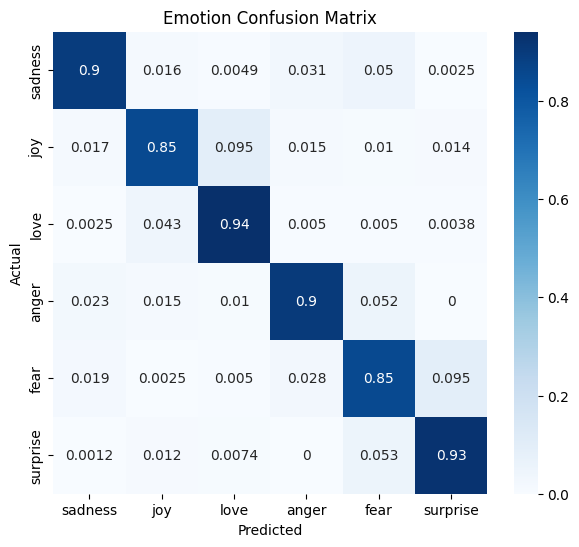

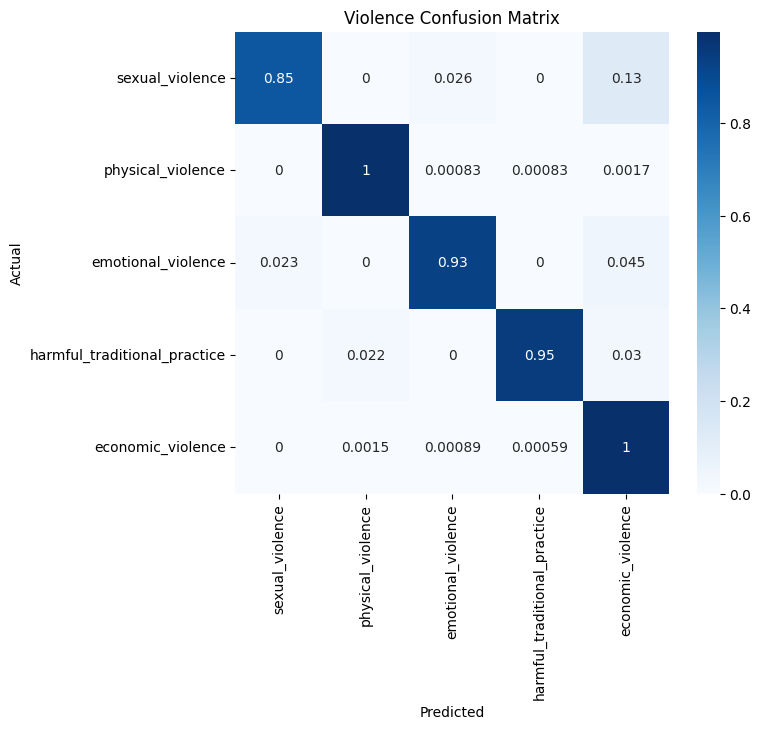

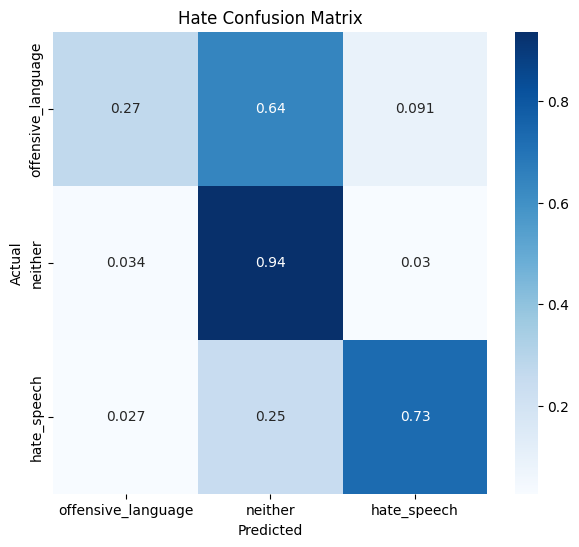

In [ ]:
plot_cm(y_test_emotion, emotion_pred, 'Emotion Confusion Matrix', emotion_labels_text)
plot_cm(y_test_violence, violence_pred, 'Violence Confusion Matrix', violence_labels_text)
plot_cm(y_test_hate, hate_pred, 'Hate Confusion Matrix', hate_labels_text)

# **Manual Testing**

In [ ]:
def classify_text(input_text):
  #preprocess the input text
  input_text_cleaned = remove_stopwords(input_text)
  input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
  input_padded = pad_sequences(input_sequence, maxlen = max_length, padding = 'post')

  #prediction
  predictions = model.predict({'emotion_input' : input_padded,
                            'violence_input' : input_padded,
                            'hate_input' : input_padded})
  emotion_pred = np.argmax(predictions[0], axis = 1)[0]
  violence_pred = np.argmax(predictions[1], axis = 1)[0]
  hate_pred = np.argmax(predictions[2], axis = 1)[0]

  #determine major label
  major_labels = ['Emotion', 'Violence', 'Hate']
  major_label_index = np.argmax([np.max(predictions[0]), np.max(predictions[1]), np.max(predictions[2])])
  major_label = major_labels[major_label_index]

  #determing sub - labels
  emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
  violence_labels_text = ['sexual_violence', 'physical_violence', 'emotional_violence', 'Harmful_traditional_practice', 'economic violence']
  hate_labels_text = ['offensive speech', 'Neither', 'Hate Speech']

  if major_label == 'Emotion':
    sub_label = emotion_labels_text[emotion_pred]
  elif major_label == 'Violence':
    sub_label = violence_labels_text[violence_pred]
  else:
    sub_label = hate_labels_text[hate_pred]

  return major_label, sub_label

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
#define a text widget and a placeholder
input_text_widget = widgets.Text(
    description = 'Input text : ',
    placeholder = 'Enter you text'
)

In [ ]:
#define classify button
button = widgets.Button(description = 'classify')

In [ ]:
#define an output area to display result
output = widgets.Output()

In [ ]:
#function to handle event
def on_button_click(b):
  with output:
    output.clear_output()   #clear the previous output
    input_text = input_text_widget.value
    major_label, sub_label = classify_text(input_text)
    print(f'Major Label : {major_label}')
    print(f'Sub Label : {sub_label}')

#attach the button at bottom
button.on_click(on_button_click)

In [ ]:
display(input_text_widget, button, output)

Text(value='', description='Input text : ', placeholder='Enter you text')

Button(description='classify', style=ButtonStyle())

Output()